# 가설별로 EDA와 추론통계

### 1. Community Area 별 범죄 유형이 다르게 나타날 것이다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
chicago = pd.read_csv('/content/drive/MyDrive/final_csv/chicago_final.csv')

In [4]:
chicago.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location', 'geometry', 'Community Area Name', 'F_Date',
       'Time', 'Hour', 'Weekday', 'Month', 'name', 'population', 'income',
       'requests', 'latinos', 'blacks', 'white', 'asian', 'other', 'region'],
      dtype='object')

In [5]:
chicago[['Community Area Name', 'Primary Type']].head()

,Community Area Name,Primary Type
0,Roseland,ROBBERY
1,Roseland,ROBBERY
2,West Pullman,ROBBERY
3,Jefferson Park,BURGLARY
4,Auburn Gresham,ROBBERY


- 지역별 나타나는 범죄 유형 보기

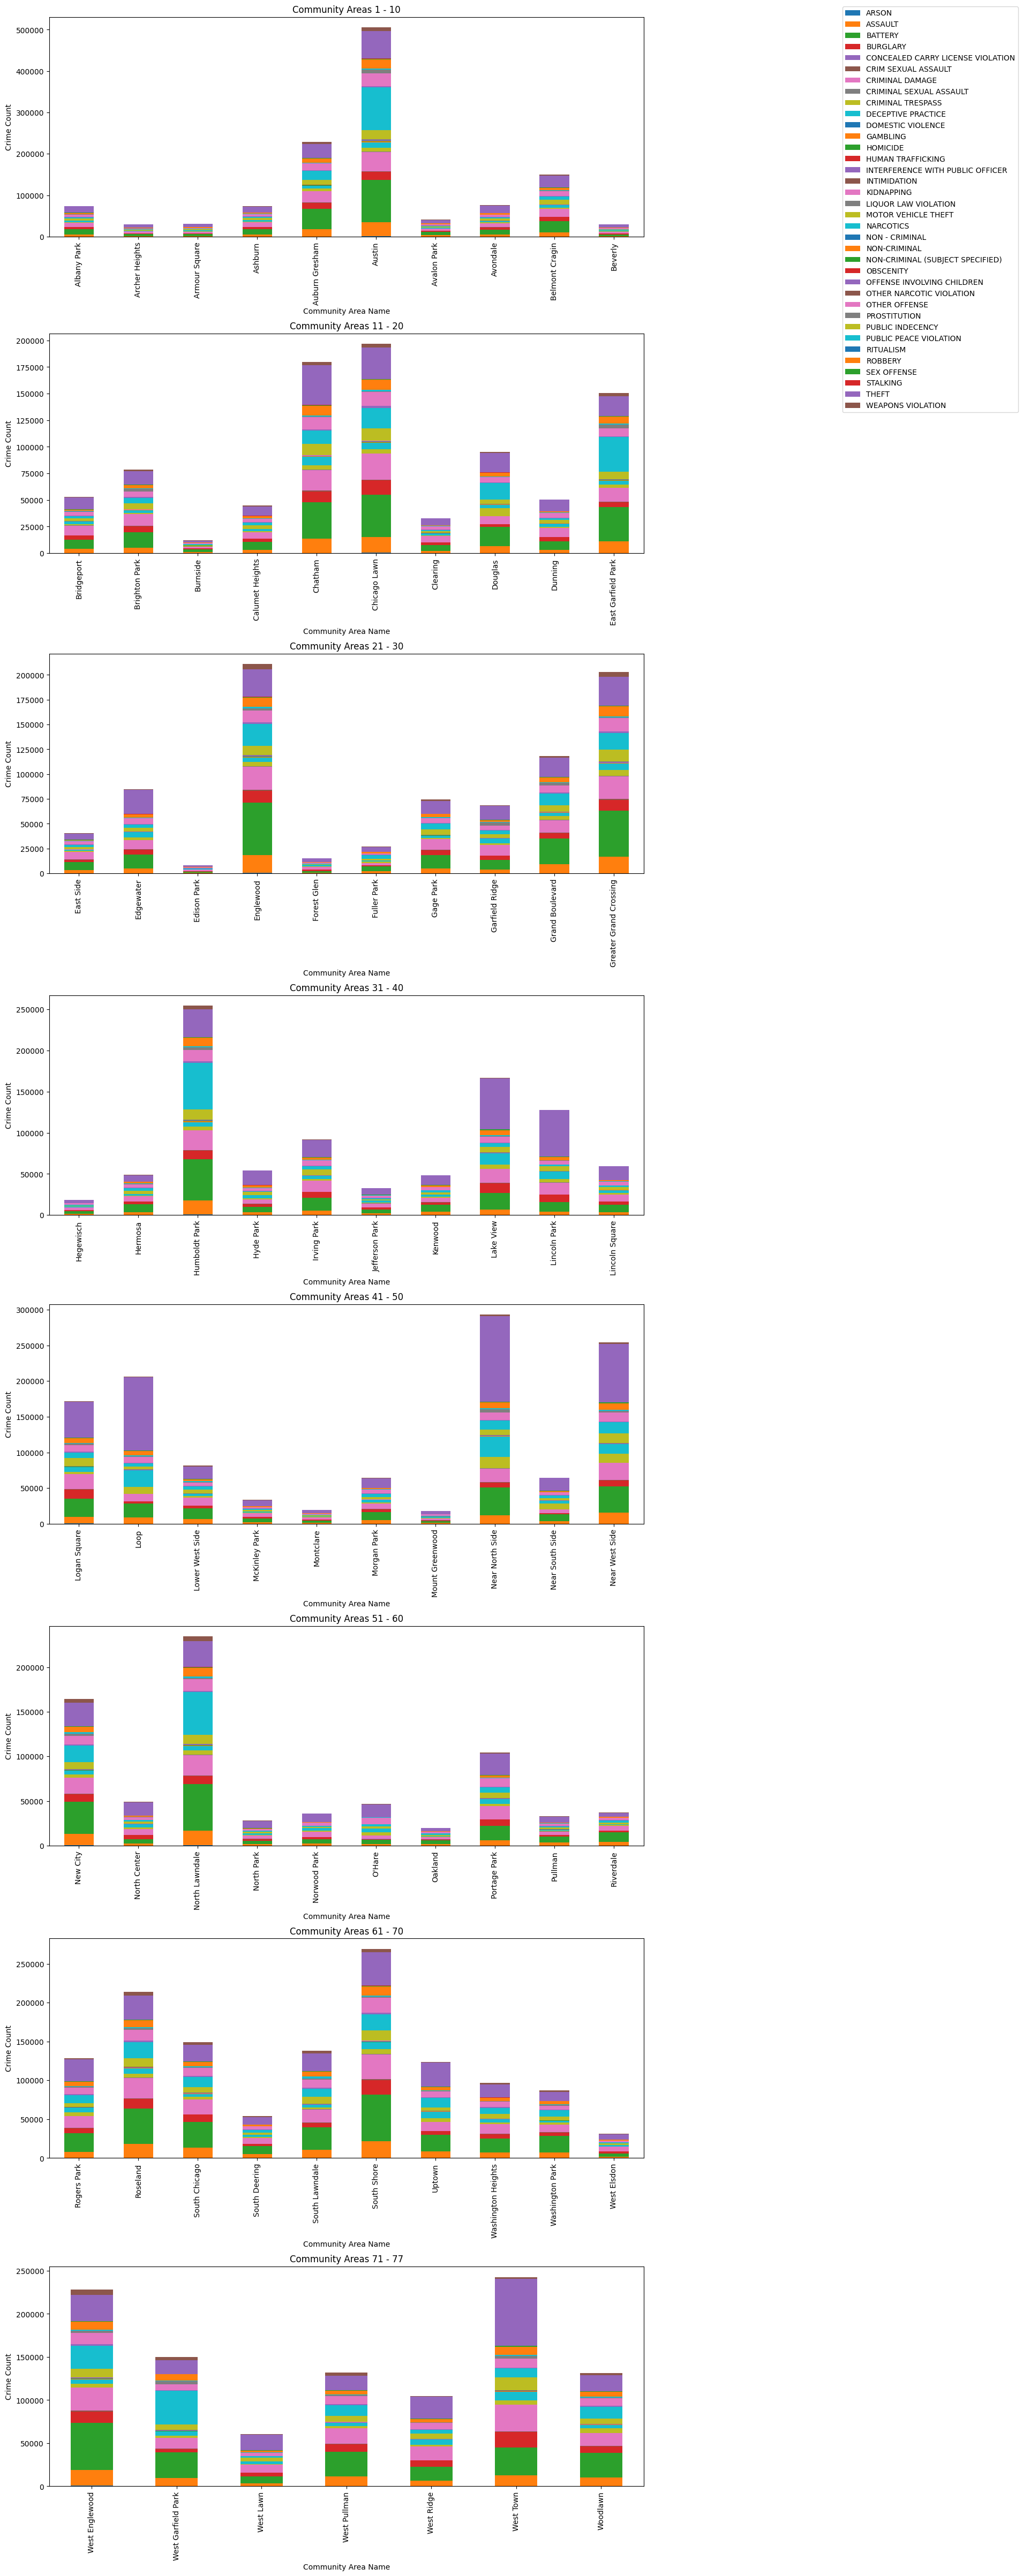

In [9]:
# 지역별 범죄 유형 데이터 생성
crime_by_region = chicago.groupby(['Community Area Name', 'Primary Type']).size().unstack()

# 지역을 10개씩 나누기
num_regions = len(crime_by_region)
regions_per_plot = 10
num_plots = (num_regions // regions_per_plot) + (1 if num_regions % regions_per_plot != 0 else 0)

# 그래프 그리기
fig, axes = plt.subplots(num_plots, 1, figsize=(12, 6 * num_plots), constrained_layout=True)

if num_plots == 1:
    axes = [axes]  # 그래프가 하나일 경우 리스트로 변환

for i in range(num_plots):
    start = i * regions_per_plot
    end = start + regions_per_plot
    ax = axes[i]

    crime_by_region.iloc[start:end].plot(kind='bar', stacked=True, ax=ax, legend=False)  # 개별 범례 제거
    ax.set_title(f'Community Areas {start + 1} - {min(end, num_regions)}')
    ax.set_ylabel('Crime Count')
    ax.set_xlabel('Community Area Name')

# 모든 그래프에 대해 하나의 범례를 바깥쪽으로 통일
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.3, 1))  # 범례를 더 오른쪽으로 이동

plt.show()


- 지역별 나타나는 범죄 top3

<ipython-input-11-778646bcf07b>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3_crimes = crime_counts.groupby('Community Area Name').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)
<ipython-input-11-778646bcf07b>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-11-778646bcf07b>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-11-778646bcf07b>:37: Us

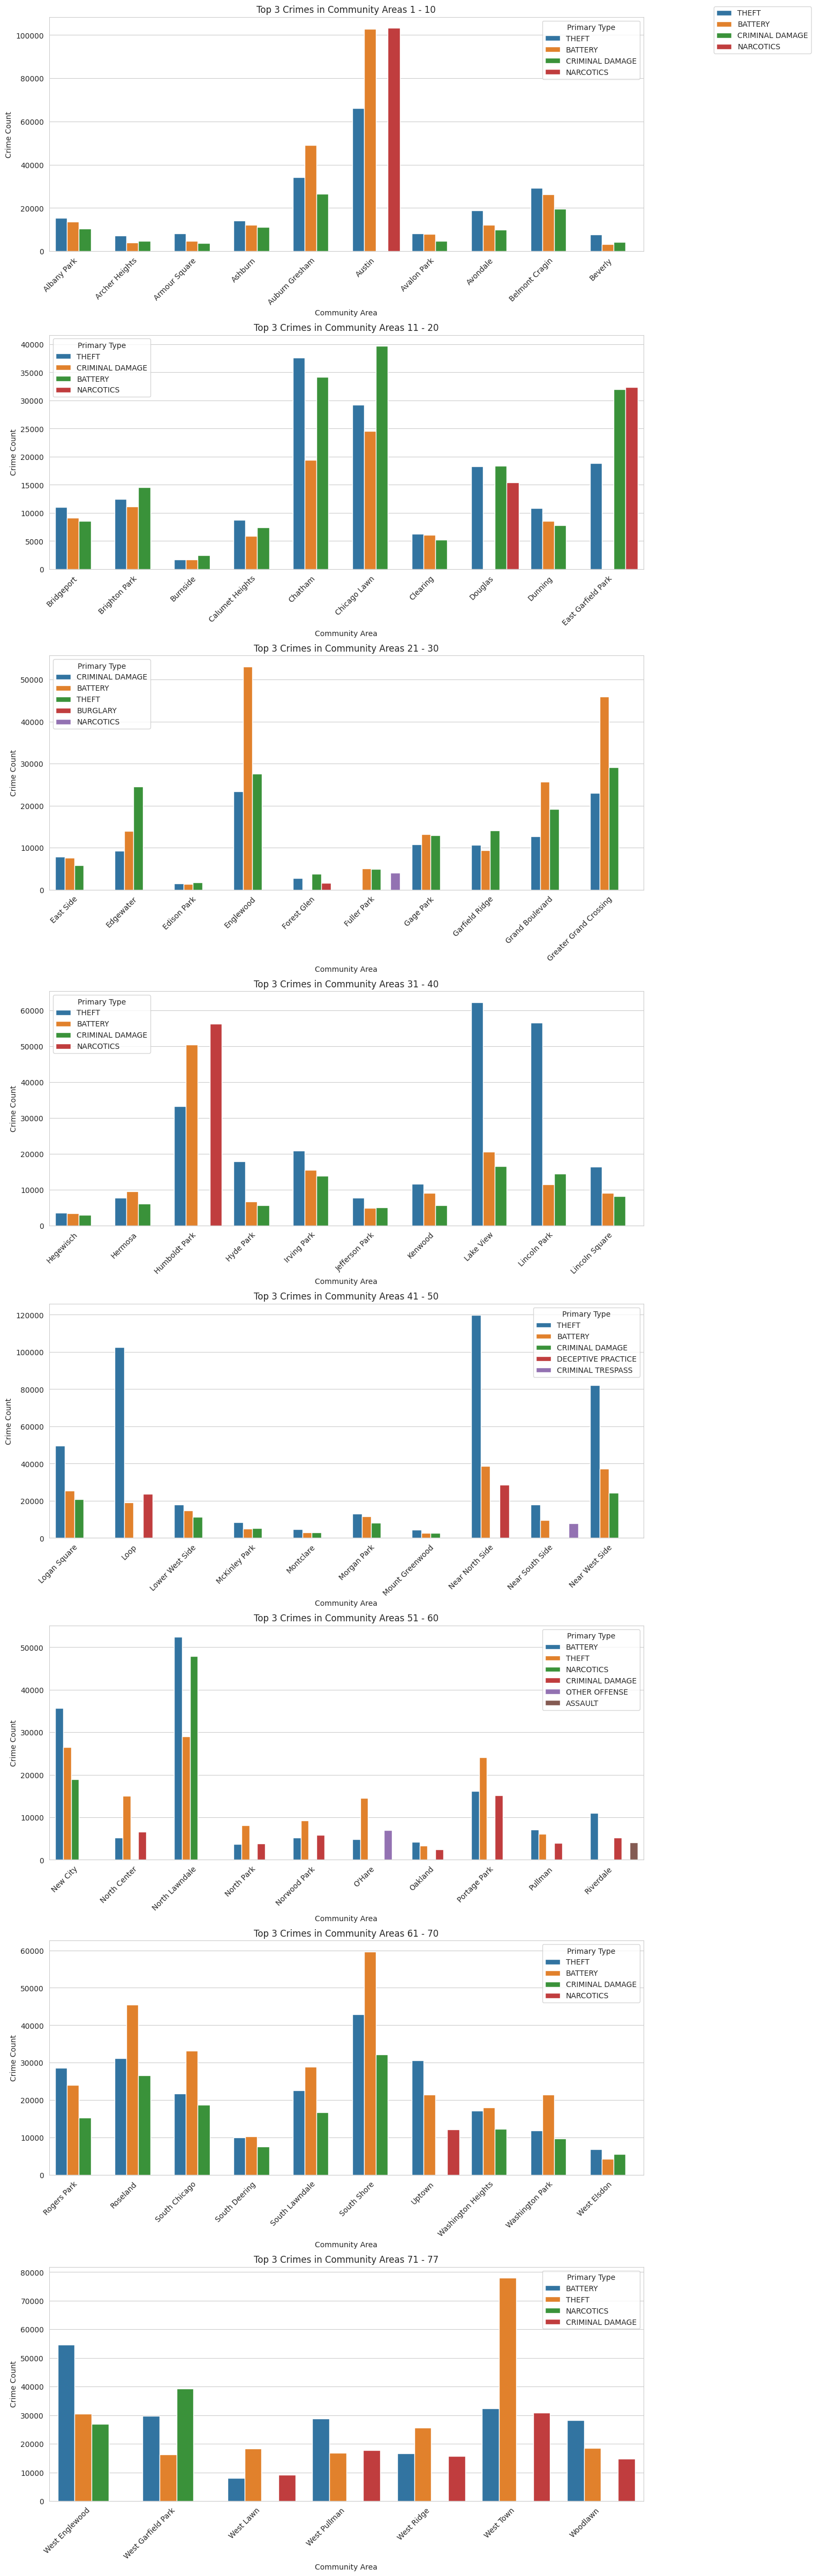

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일 적용
sns.set_style("whitegrid")

# 지역별 범죄 유형 개수 계산
crime_counts = chicago.groupby(['Community Area Name', 'Primary Type']).size().reset_index(name='Count')

# 각 지역별 Top 3 범죄 유형 선택
top3_crimes = crime_counts.groupby('Community Area Name').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Community Area를 10개씩 묶기
community_areas = top3_crimes['Community Area Name'].unique()
num_plots = (len(community_areas) // 10) + (1 if len(community_areas) % 10 != 0 else 0)

# 그래프 그리기
fig, axes = plt.subplots(num_plots, 1, figsize=(12, 6 * num_plots), constrained_layout=True)

if num_plots == 1:
    axes = [axes]  # 그래프가 하나일 경우 리스트로 변환

for i in range(num_plots):
    start = i * 10
    end = start + 10
    selected_areas = community_areas[start:end]

    ax = axes[i]
    subset = top3_crimes[top3_crimes['Community Area Name'].isin(selected_areas)]

    # 막대그래프 그리기
    sns.barplot(x='Community Area Name', y='Count', hue='Primary Type', data=subset, ax=ax)

    ax.set_title(f'Top 3 Crimes in Community Areas {start + 1} - {min(end, len(community_areas))}')
    ax.set_ylabel('Crime Count')
    ax.set_xlabel('Community Area')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 범례를 그래프 바깥으로 이동
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.1, 1))

plt.show()


- 큰 지역 (region) 별로 많이 일어나는 범죄 유형 top5

<ipython-input-12-d1e09a431dc8>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_crimes = crime_counts.groupby('region').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)
<ipython-input-12-d1e09a431dc8>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Primary Type', y='Count', data=subset, ax=ax, palette='muted')
<ipython-input-12-d1e09a431dc8>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=4

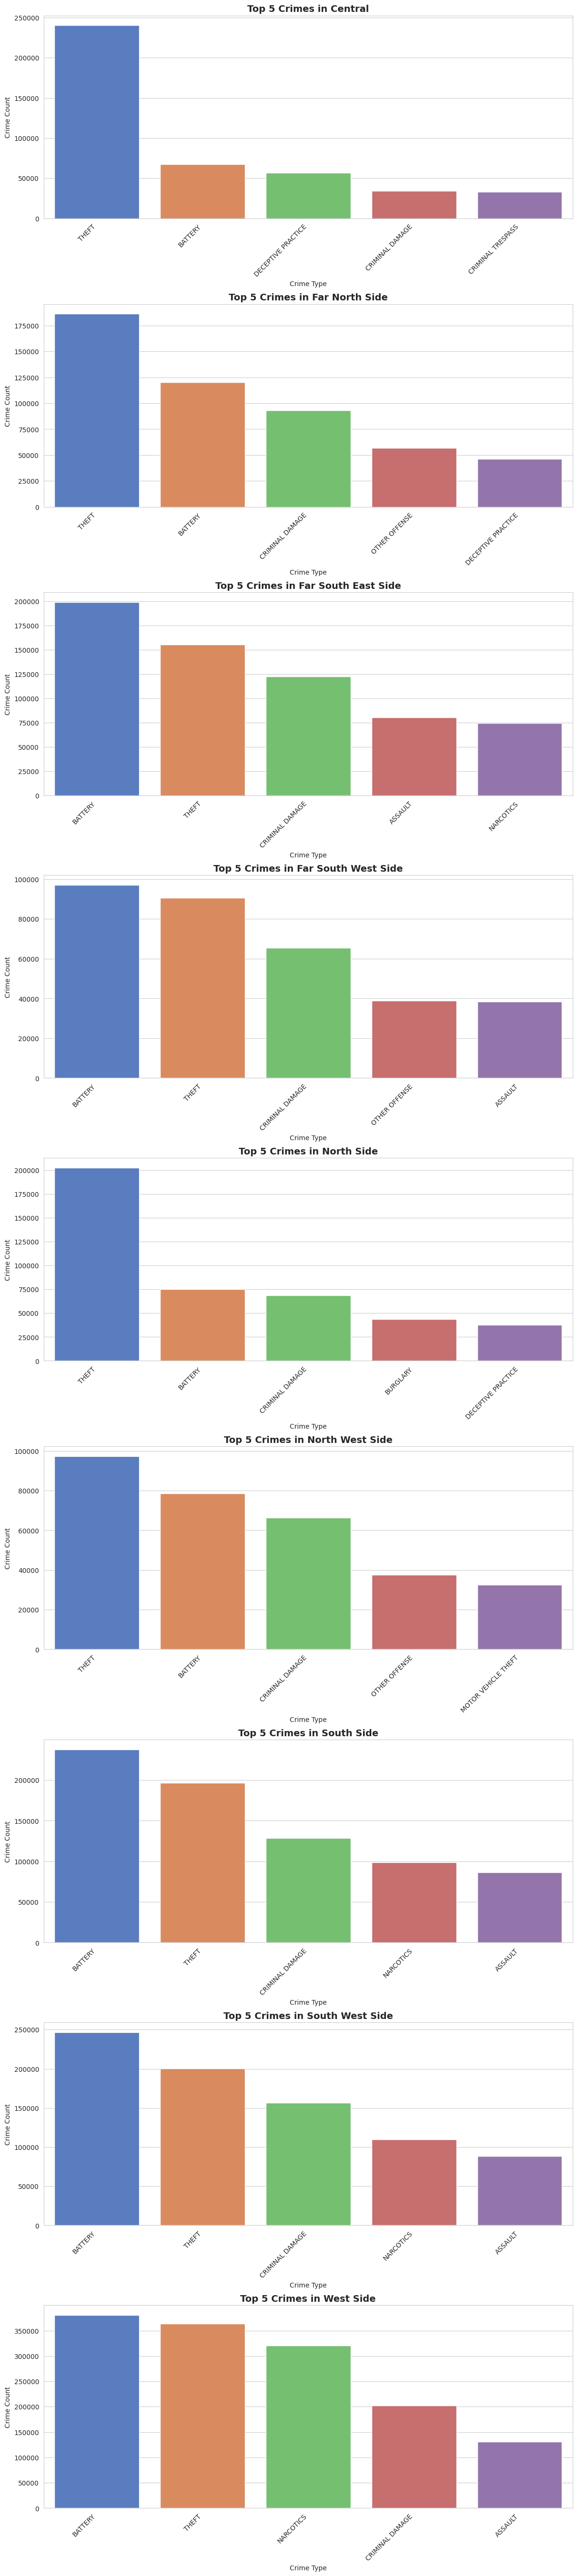

In [12]:
# Seaborn 스타일 적용
sns.set_style("whitegrid")

# 지역별 범죄 유형 개수 계산
crime_counts = chicago.groupby(['region', 'Primary Type']).size().reset_index(name='Count')

# 각 region별 Top 5 범죄 유형 선택
top5_crimes = crime_counts.groupby('region').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

# region별 그래프 개수 설정
regions = top5_crimes['region'].unique()
num_regions = len(regions)

fig, axes = plt.subplots(num_regions, 1, figsize=(12, 6 * num_regions), constrained_layout=True)

if num_regions == 1:
    axes = [axes]  # 그래프가 하나일 경우 리스트로 변환

for i, region in enumerate(regions):
    ax = axes[i]
    subset = top5_crimes[top5_crimes['region'] == region]

    # 막대그래프 그리기 (누적 X)
    sns.barplot(x='Primary Type', y='Count', data=subset, ax=ax, palette='muted')

    ax.set_title(f'Top 5 Crimes in {region}', fontsize=14, fontweight='bold')
    ax.set_ylabel('Crime Count')
    ax.set_xlabel('Crime Type')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

### 강력범죄는 어떻게 분포되어있을까?

<ipython-input-14-3e2bac305bc6>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3_crimes = crime_counts.groupby('Community Area Name').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)
<ipython-input-14-3e2bac305bc6>:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-14-3e2bac305bc6>:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-14-3e2bac305bc6>:46: Us

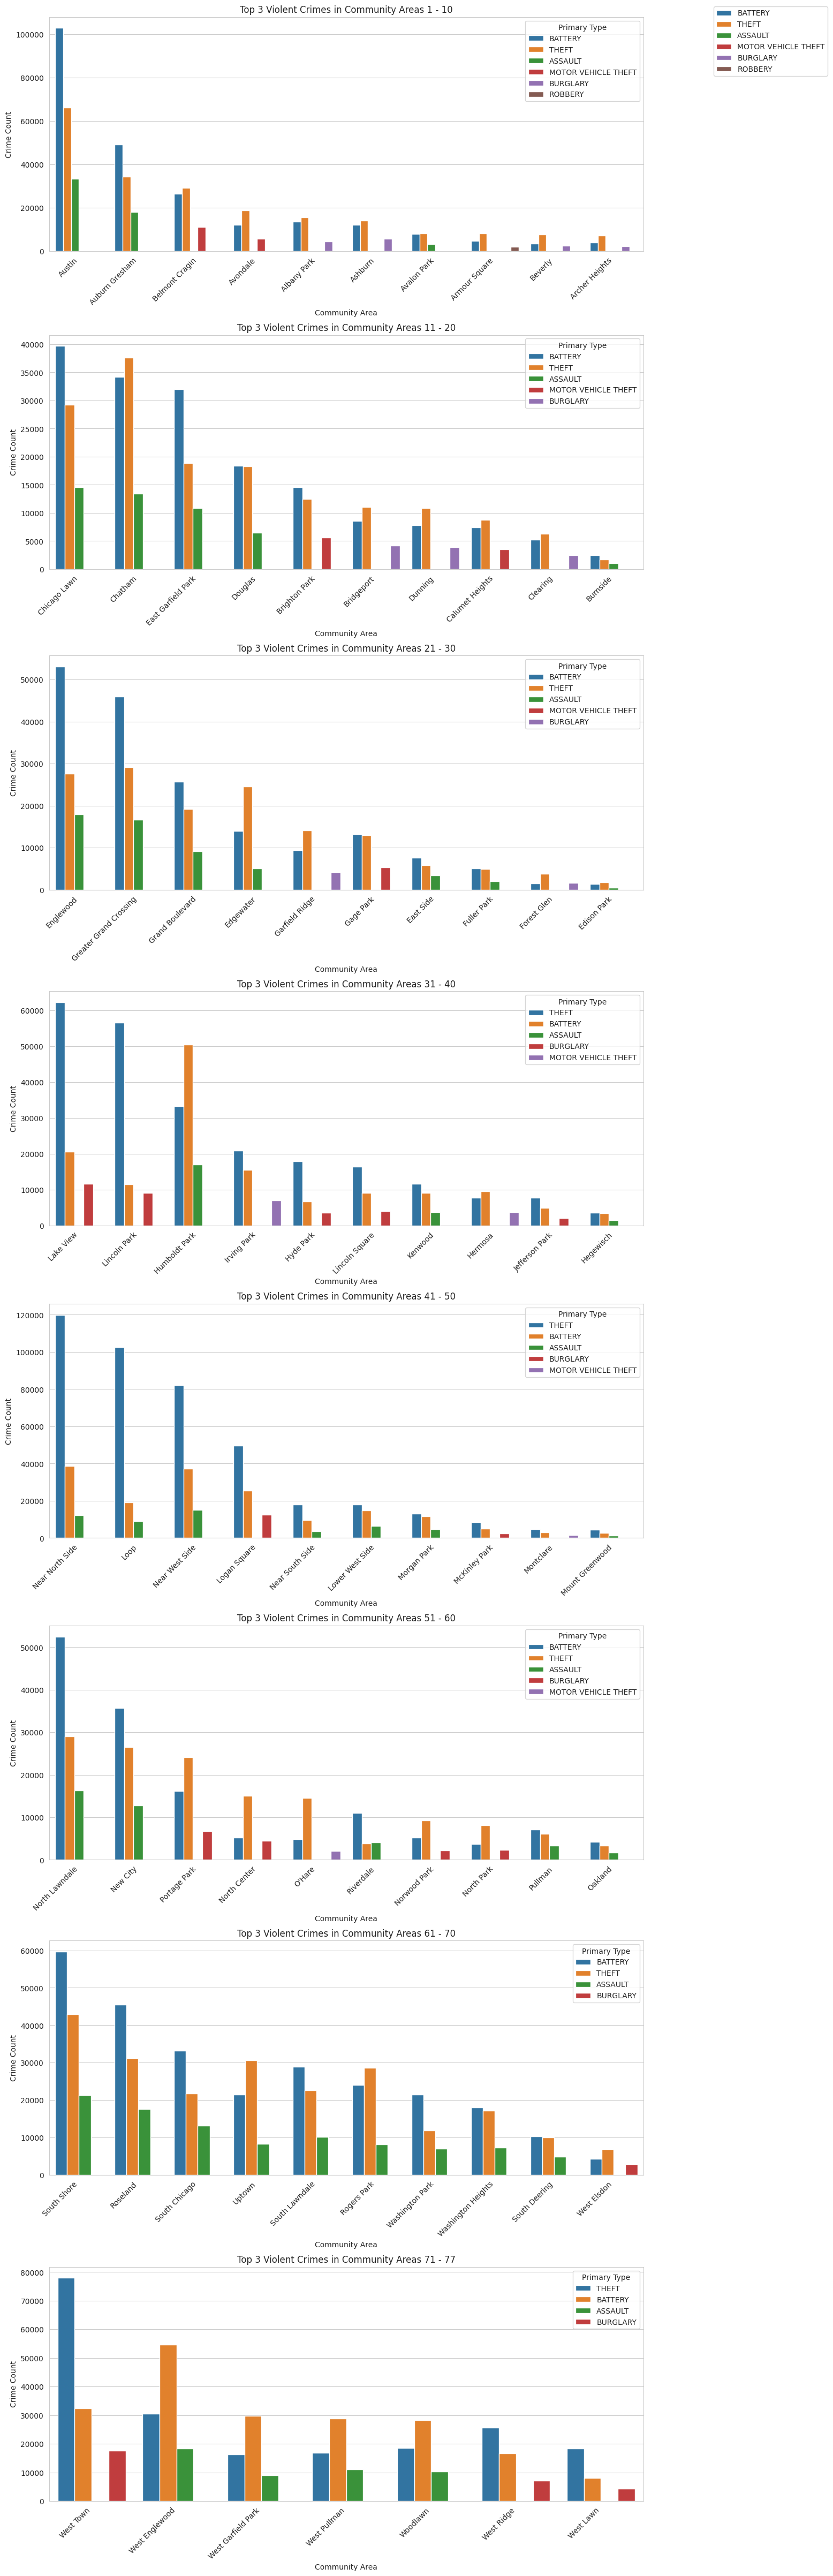

In [14]:
# Seaborn 스타일 적용
sns.set_style("whitegrid")

# 강력범죄 리스트 정의
violent_crimes = [
    "HOMICIDE", "CRIMINAL SEXUAL ASSAULT", "ROBBERY", "BATTERY", "RITUALISM",
    "ASSAULT", "BURGLARY", "THEFT", "MOTOR VEHICLE THEFT", "HUMAN TRAFFICKING", "ARSON"
]

# 강력범죄만 필터링
violent_crime_data = chicago[chicago['Primary Type'].isin(violent_crimes)]

# Community Area별 범죄 유형 개수 계산
crime_counts = violent_crime_data.groupby(['Community Area Name', 'Primary Type']).size().reset_index(name='Count')

# 각 Community Area별 Top 3 강력범죄 선택
top3_crimes = crime_counts.groupby('Community Area Name').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Community Area를 10개씩 묶기
community_areas = top3_crimes['Community Area Name'].unique()
num_plots = (len(community_areas) // 10) + (1 if len(community_areas) % 10 != 0 else 0)

# 그래프 그리기
fig, axes = plt.subplots(num_plots, 1, figsize=(12, 6 * num_plots), constrained_layout=True)

if num_plots == 1:
    axes = [axes]  # 그래프가 하나일 경우 리스트로 변환

for i in range(num_plots):
    start = i * 10
    end = start + 10
    selected_areas = community_areas[start:end]

    ax = axes[i]
    subset = top3_crimes[top3_crimes['Community Area Name'].isin(selected_areas)]

    # 범죄 유형을 Count를 기준으로 내림차순 정렬
    subset = subset.sort_values(by='Count', ascending=False)

    # 막대그래프 그리기
    sns.barplot(x='Community Area Name', y='Count', hue='Primary Type', data=subset, ax=ax)

    ax.set_title(f'Top 3 Violent Crimes in Community Areas {start + 1} - {min(end, len(community_areas))}')
    ax.set_ylabel('Crime Count')
    ax.set_xlabel('Community Area')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 범례를 그래프 바깥으로 이동
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.1, 1))

plt.show()


- 총 강력범죄건수 내림차순

<ipython-input-16-430f99ca7326>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-16-430f99ca7326>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-16-430f99ca7326>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-16-430f99ca7326>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-16-430f99ca7326>:34: UserWarning: set_ticklabels() should

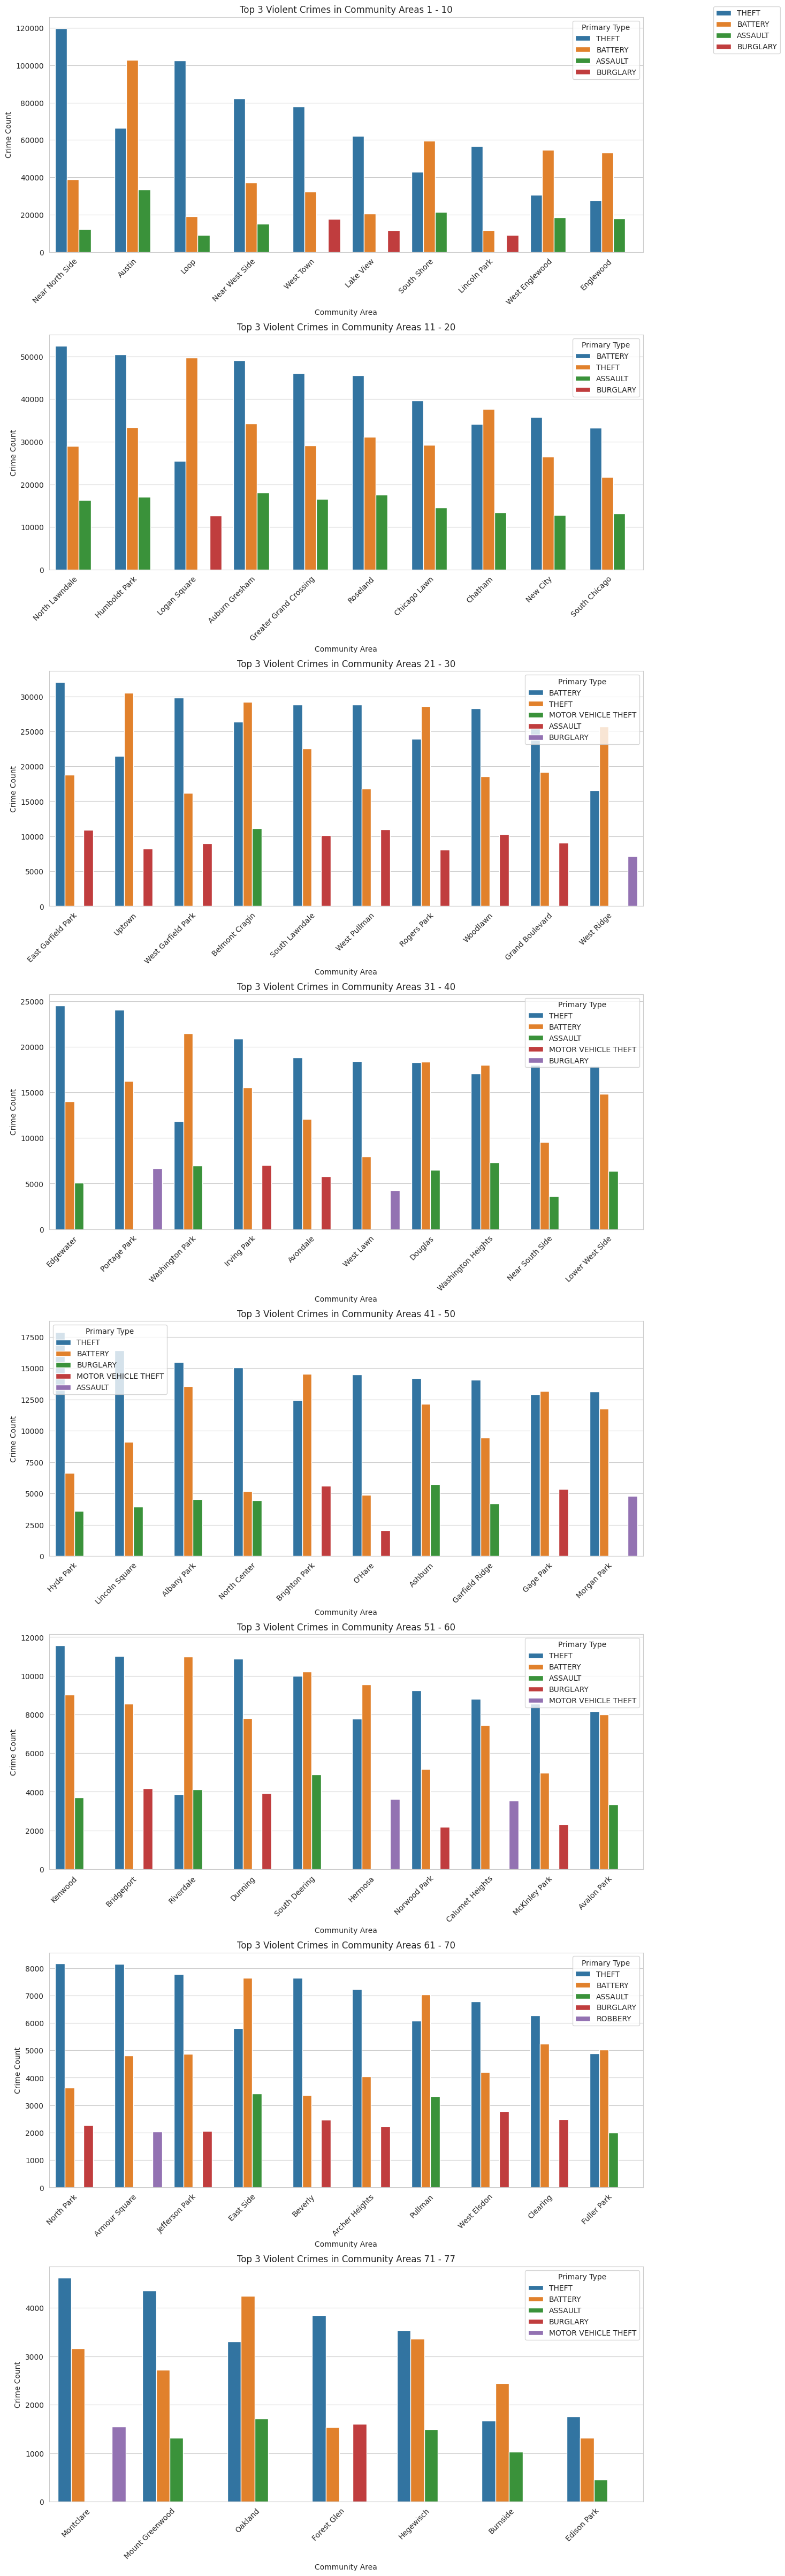

In [16]:
# Community Area별 범죄 유형 개수 계산
crime_counts = violent_crime_data.groupby(['Community Area Name', 'Primary Type']).size().reset_index(name='Count')

# 모든 Community Area를 기준으로 Count 기준 내림차순으로 정렬
crime_counts_sorted = crime_counts.sort_values(by='Count', ascending=False)

# 각 Community Area별 Top 3 강력범죄 선택
top3_crimes = crime_counts_sorted.groupby('Community Area Name').head(3).reset_index(drop=True)

# Community Area를 10개씩 묶기
community_areas = top3_crimes['Community Area Name'].unique()
num_plots = (len(community_areas) // 10) + (1 if len(community_areas) % 10 != 0 else 0)

# 그래프 그리기
fig, axes = plt.subplots(num_plots, 1, figsize=(12, 6 * num_plots), constrained_layout=True)

if num_plots == 1:
    axes = [axes]  # 그래프가 하나일 경우 리스트로 변환

for i in range(num_plots):
    start = i * 10
    end = start + 10
    selected_areas = community_areas[start:end]

    ax = axes[i]
    subset = top3_crimes[top3_crimes['Community Area Name'].isin(selected_areas)]

    # 막대그래프 그리기
    sns.barplot(x='Community Area Name', y='Count', hue='Primary Type', data=subset, ax=ax)

    ax.set_title(f'Top 3 Violent Crimes in Community Areas {start + 1} - {min(end, len(community_areas))}')
    ax.set_ylabel('Crime Count')
    ax.set_xlabel('Community Area')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 범례를 그래프 바깥으로 이동
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.1, 1))

plt.show()


- 강력 범죄의 총 건수가 많은 Community Area

<Figure size 1200x800 with 0 Axes>

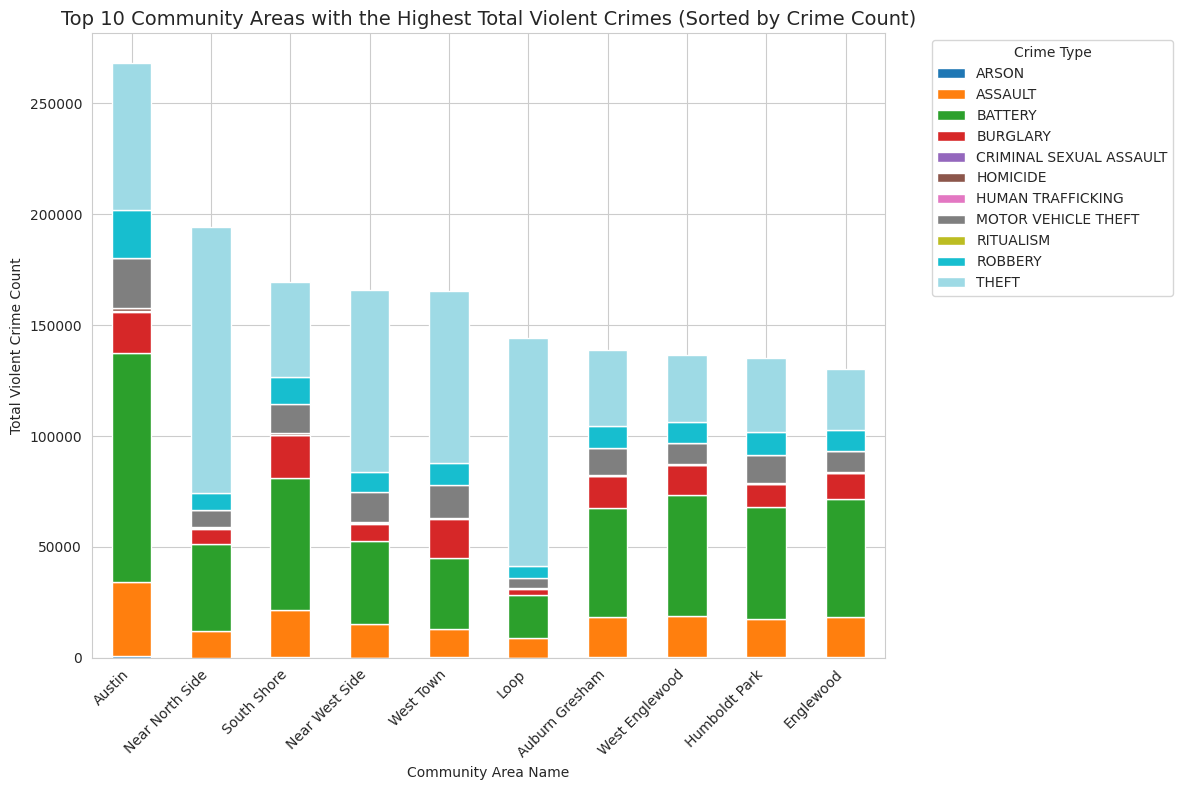

In [24]:
# Community Area별 범죄 유형 개수 계산
crime_counts = violent_crime_data.groupby(['Community Area Name', 'Primary Type']).size().unstack(fill_value=0)

# 각 Community Area별 강력범죄 총 건수 계산
total_crime_by_area = crime_counts.sum(axis=1).reset_index(name='Total Crimes')

# 총 건수를 기준으로 내림차순 정렬하고 Top 10 지역 선택
top10_violent_areas = total_crime_by_area.sort_values(by='Total Crimes', ascending=False).head(10)

# Top 10 지역에 대한 강력범죄 유형별 누적 데이터
top10_crime_data = crime_counts.loc[top10_violent_areas['Community Area Name']]

# 각 지역별로 강력범죄 유형을 건수 기준으로 내림차순 정렬
top10_crime_data_sorted = top10_crime_data.apply(lambda row: row.sort_values(ascending=False), axis=1)

# 그래프 그리기
plt.figure(figsize=(12, 8))

# 누적 그래프 그리기 (각 강력범죄 유형을 컬럼으로 사용)
top10_crime_data_sorted.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')

# 그래프 설정
plt.title('Top 10 Community Areas with the Highest Total Violent Crimes (Sorted by Crime Count)', fontsize=14)
plt.xlabel('Community Area Name')
plt.ylabel('Total Violent Crime Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [20]:
top10_violent_areas

,Community Area Name,Total Crimes
5,Austin,268126
47,Near North Side,194214
65,South Shore,169361
49,Near West Side,166022
75,West Town,165585
41,Loop,144226
4,Auburn Gresham,138871
70,West Englewood,136656
32,Humboldt Park,135170
23,Englewood,130207


강력범죄가 많이 발생하는 지역<br>

In [26]:
top10_crime_data

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CRIMINAL SEXUAL ASSAULT,HOMICIDE,HUMAN TRAFFICKING,MOTOR VEHICLE THEFT,RITUALISM,ROBBERY,THEFT
Community Area Name,,,,,,,,,,,
Austin,979,33432,102837,18785,560,1145,11,22301,2,21806,66268
Near North Side,99,12218,38828,6800,717,144,3,7727,2,7822,119854
South Shore,364,21286,59630,19046,358,567,2,13399,0,11814,42895
Near West Side,177,15175,37243,7915,338,279,8,13831,0,9025,82031
West Town,401,12533,32304,17599,209,202,1,14788,0,9619,77929
Loop,77,9113,19057,2999,253,44,3,4392,0,5704,102584
Auburn Gresham,367,18024,49112,14415,201,482,5,11847,1,10190,34227
West Englewood,545,18396,54650,13179,194,550,6,9569,1,9114,30452
Humboldt Park,609,17054,50439,10165,219,570,2,12543,1,10225,33343
